EAE3709 APLICACIONES DE  MACHINE LEARNING EN ECONOMÍA <br>
1ER SEMESTRE 2025 <br>
INSTITUTO DE ECONOMÍA <br>
PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE


# **TAREA 1**


---


Profesor:
- Joaquín Pérez Lapillo

Ayudantes:

- Luis García B.
- Sebastián Hernández B.
- Oscar Herrera G.


**Complete sus datos:**

- Nombre y apellido:
  - Fabian Estay
  - Tomás Ponce
- Usuario de GitHub (opcional):  `# Completar`


## Instrucciones

- Descargue el notebook y cárguelo en su Drive.
- Todas las preguntas deben ser contestadas en su notebook.
- Para que una pregunta esté correcta el código debe correr.
- Si es necesario, realice comentarios breves en su código explicando lo que está realizando o sus resultados.
- Una vez culminada su tarea, suba su notebook al buzón de tareas de Canvas.
- La fecha y hora límite de esta tarea es el _**viernes 4 de abril a las 18:00 hrs**_.



### Distribución de puntaje


| Pregunta                        | Puntaje |
|--------------------------------|---------|
| Pregunta 1.0                   |    1    |
| Pregunta 1.1                   |    3    |
| Pregunta 1.2                   |    3    |
| Pregunta 1.3                   |    2    |
| Pregunta 1.4                   |    2    |
| Pregunta 1.5                   |    5    |
| Pregunta 1.6                   |    2    |
| Pregunta 1.7                   |    5    |
| Pregunta 1.8                   |   7    |
| Pregunta 1.9                   |   5    |
| Pregunta 1.10                  |   5    |
| Pregunta 1.11                  |   6    |
| Pregunta 1.12                  |    2    |
| Pregunta 1.13                  |    5    |
| Pregunta 1.14                  |   10    |
| Pregunta 1.15                  |    5    |
| Pregunta 1.16                  |    5    |
| Pregunta 2.0                   |    2    |
| Pregunta 2.1                   |    5    |
| Pregunta 2.2                   |    5    |
| Pregunta 2.3                   |    5    |
| Pregunta 2.4                   |    3    |
| Pregunta 2.5                   |    3    |
| Pregunta 2.6                   |    2    |
| Pregunta 2.7                   |    2    |

Total: 100 pts.


### Sobre el Bonus

- La entrega, por defecto, es a través de Canvas. Sin embargo, puede escoger voluntariamente entregar la tarea en su GitHub personal.

- Si usted realiza la entrega en GitHub antes de la **fecha y hora indicada**, entonces tendrá una bonificación de 0.3 en su nota final de tarea. Es decir, si usted obtuvo una nota de 6.5, pero entregó en su GitHub, entonces su calificación en esta tarea será de 6.8.

- Si **además** de realizar la entrega a través de GitHub, usted logra crear `branches` (ramas) y realizar un `merge` entre ramas, entonces se le bonificará con 0.5 en su nota de tarea. Es decir, si usted obtuvo una nota de 6.5, pero entregó en su GitHub e hizo el trabajo de ramas, entonces su calificación en esta tarea será de 7.0.

  - Se valora capacidad autodidacta.
  - Sólo serán considerados los archivos contenidos en su rama principal a la fecha y hora indicada.



## Exploratory data analysis (EDA)

Para esta tarea se utilizará como principal fuente de información un dataset con una serie de características económicas, demográficas y de desarrollo humano de distintos países a la fecha de 2007 (corte transversal). El dataset está disponible en el siguiente [Github](https://raw.githubusercontent.com/lfgarcia-1/EAE3709-1-2025/refs/heads/main/economic_dataset.csv).<br>

Descripción del dataset:

Variables:

*   date: Fecha en la que se actualizó la data.
*   Population, Area (sq. mi.) Pop. Density (per sq. mi.), Coastline (coast/area ratio), Net migration, Infant mortality (per 1000 births), GDP ($ per capita, Literacy (%), Phones (per 1000), Arable (%), Crops (%), Other (%), Climate, Birthrate, Deathrate, Agriculture, Industry, Service: Características del país.
*   source: fuente de los datos.
*   Region: Región (grupo de países).
*   Country: País.

### Pregunta 1.0

Importe las librerías que usará en su tarea.

In [ ]:
# Importamos las librerías que utilizaremos

from sklearn import datasets, linear_model  # https://scikit-learn.org/stable/datasets/toy_dataset.html
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split #Particiona en datos de entrenamiento y prueba

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#Librería que filtra warnings innecesarios
import warnings
warnings.filterwarnings("ignore")

### Pregunta 1.1

Importe el dataset como un DataFrame (df) directamente desde Github (es decir, no descargue el archivo manualmente). A lo largo de la tarea este df se denominará como `df`.


In [ ]:
url='https://raw.githubusercontent.com/lfgarcia-1/EAE3709-1-2025/refs/heads/main/economic_dataset.csv'
df=pd.read_csv(url)

### Pregunta 1.2

Utilice las funciones de Pandas `head()`, `tail()`, `info()` y la propiedad (o atributo) `.dtypes` para describir el `df`. Explique brevemente para qué sirve cada función.

In [ ]:
df.head()

,date,source,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,2007-01-01,US Goverment,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,...,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,2007-01-01,US Goverment,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,2007-01-01,US Goverment,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,...,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,2007-01-01,US Goverment,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,2007-01-01,US Goverment,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [ ]:
df.tail()

,date,source,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
222,2007-01-01,US Goverment,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,...,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,2007-01-01,US Goverment,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,...,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,2007-01-01,US Goverment,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,...,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,2007-01-01,US Goverment,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,...,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489
226,2007-01-01,US Goverment,Zimbabwe,SUB-SAHARAN AFRICA,12236805,390580,31.3,0.00,0.00,67.69,...,26.8,8.32,0.34,91.34,2.0,28.01,21.84,0.179,0.243,0.579


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                227 non-null    object 
 1   source                              227 non-null    object 
 2   Country                             227 non-null    object 
 3   Region                              227 non-null    object 
 4   Population                          227 non-null    int64  
 5   Area (sq. mi.)                      227 non-null    int64  
 6   Pop. Density (per sq. mi.)          227 non-null    float64
 7   Coastline (coast/area ratio)        227 non-null    float64
 8   Net migration                       224 non-null    float64
 9   Infant mortality (per 1000 births)  224 non-null    float64
 10  GDP ($ per capita)                  226 non-null    float64
 11  Literacy (%)                        209 non-n

In [ ]:
df.dtypes

,0
date,object
source,object
Country,object
Region,object
Population,int64
Area (sq. mi.),int64
Pop. Density (per sq. mi.),float64
Coastline (coast/area ratio),float64
Net migration,float64
Infant mortality (per 1000 births),float64


### Pregunta 1.3

La variable `source` es innecesaria debido que contiene el mismo valor para todas las observaciones. Elimine esta variable de su `df`.

In [ ]:
df.drop(columns=['source'], inplace=True)

### Pregunta 1.4

Transforme el tipo de la variable `date` a `datetime` _datatype_.

In [ ]:
df['date']=pd.to_datetime(df['date'])

### Pregunta 1.5

Para determinar si las variables son "útiles" y sus valores son "correctos" es necesario comprender cada uno de los atributos del dataset.
Investigue y explique brevemente la relación **teórica** entre el `GDP (% per capita)` y cada una de las variables denominadas como "Características del país" en la introducción.

Ejemplo: Existe una variable denominada `Coastline (coast/area ratio)`. Coastline es una medida de la cantidad de costa (acceso a mar) del país normalizada al área total del país para no beneficiar a países más grandes pero con la misma proporción de costa. A mayor "Costline" aumenta la capacidad portuaria per capita del país, más puertos facilita el comercio y podría aumentar el GDP per cápita.

Population
---
La relación teorica entre el crecimiento del PIB per capita y la población es ambigua, pues una población más numerosa, por un lado, disminuye el PIB per cápita al distribuir la riqueza entre más personas. Sin embargo, por otro lado, una población numerosa tiene un efecto positivo en el PIB per capita y en su crecimiento, pues hay un aumento de la fuerza laboral y por tanto fuerza de productividad, y tambien hay un aprovechamiento de las economías de escala.
Por las razones anteriores, la cuantía de la población y el crecimiento del PIB per capita tienen una relación teorica amigua.

Area (sq. mi.)
---
Un país con mayor área geográfica tiene el potencial a acceder a más recursos naturales, tierras cultivables o espacio para desarrollo económico. Es por esto que la relación teorica es positiva, pero en ultima instancia puede verse devilitada por otros factores influyentes, como la eficiencia o la forma en que se aprovechen estos recursos.

Pop. Density (per sq. mi.)
---
Una mayor densidad poblacional puede favorecer el crecimiento del PIB per capita por una mayor eficiencia en la provisión de servicios públicos y fuerza labora. Sin ambargo, esta relación se debilita, e incluso puede llegar a anularse o a volverse negativa por otros factores influyentes, como la distribución de la fuerza laboral, la eficiencia en la distribución de bienes y servicios, y la calidad de la infraestructura. Es por estas razones que en última instancia, la relación es amigua.

Coastline (coast/area ratio)
---
Países con mayor acceso al mar en terminos de superficie tienen un mayor acceso al comercio marítimo, lo que facilita la exportación e importación de bienes, y además se favorecen sectores como la pesca, el turismo costero y el transporte maritimo. Estos factores estimulan el crecimiento económico, y se relacionan con un mayor PIB per cápita.



Net migration
---
La migración neta es el resultado de la diferencia entre la inmigración y la emigración de las fronteras del país en determinado periodo de tiempo. En promedio, países con mayor PIB per cápita suelen tener mejores condiciones de vida, por lo tanto, reciben una mayor cantidad de inmigrantes buscando mejores oportunidades, y hay menos personas emigrando hacia otros países, al no tener necesidad de buscar mejor vida en otro lado.
Por lo tanto, un país con mayor PIB per capita tendería a tener inmigración neta positiva.

Infant mortality (per 1000 births)
---
En promedio, los países con mayor PIB per capita tienen mayor acceso a servicios de la salud, a vivienda, a alimentación y a acceso a agua. Es por este mayor acceso a bienes y servicios fundamentales para la supervivencia de un niño o niña que los países con un mayor PIB per capita tenderían a tener una menor mortalidad infantil.

GDP ($ per capita)
---
PIB per cápita en dólares ($) representa el ingreso promedio por persona en términos absolutos, mientras que PIB per cápita en porcentaje (%) usualmente se refiere al crecimiento porcentual del PIB per cápita respecto al año anterior.
Teniendo estas definiciones en mente, podemos decir que un país podría tener un PIB per cápita alto en terminos absolutos, pero un bajo crecimiento. Sin embargo, un país que tenga un crecimiento mayor tendería a tener un PIB per capita mayor en terminos absolutos.
En suma, la relación entre PIB per capita en terminos absolutos y en terminos de crecimiento es ambigua, aunque en promedio y teoricamente, tendería a ser positiva.

Literacy (%)
---
Una mayor tasa de alfabetización está relacionada con un mayor acceso a la educación, y a una población más culta, educada, y capaz de resolver problemas y desenvolverse en el mercado.
Es por esto que una mayor tasa de alfabetización se relaciona con un mayor crecimiento del PIB per capita.
Además, un PIB per capita mayor se asocia a que las familias tienen mayores oportunidades para brindarle a sus hijos un mejor acceso a educación.


Phones (per 1000)
---
Phones representaría una medida del acceso a telefonos en la población, en promedio. Al haber un mayor acceso a telefonos, hay una facilidad de comunicación, acceso a la información, y eficacia al desenvolverse en el mercado. Es por esta razón que un mayor acceso a telefonos estaría relacionado a un mayor crecimiento del PIB per capita.
Además, el crecimiento del PIB per capita está relacionado con un mayor acceso a bienes por parte de la población, por lo que hay tambien un mayor acceso a telefonos.
Arable (%)
---
Arable es una variable que representa el porcentaje del territorio que es apto para cultivo.
Por un lado, una mayor proporción de tierra arable puede facilitar el desarrollo de la agricultura, lo cual puede ser una fuente de crecimiento para el país, aumentando el crecimiento del PIB per cápita, especialmente en economías en desarrollo.
Sin embargo, en economías más desarrolladas, esta variable puede generar un efecto más debil o nulo, pues estas economías son menos intensivas en el sector de la agricultura, dependiendo más de sectores más industriales.
En suma, la relación entre el crecimiento del PIB per cápita y la proporción de tierra arable es incierta, dependiendo del nivel de desarrollo de la economía, y de la forma en que se manejen inversiones y recursos.

Crops (%)
---
Crops es el porcentaje del territorio destinado al cultivo de cultivos permanentes o temporales.
Similar a la variable Arable, la relación de esta variable con el crecimiento del PIB per cápita depende del nivel de desarrollo económico de un país, pues economías en desarrollo altamente intensivas en el sector agrícola mostrarán una relación positiva entre el crecimiento y el porcentaje del territorio destinado al cultivo. Sin embargo, en países más desarrollados, y más dependientes en sectores industriales, esta dependencia puede ser mucho más baja o nula.
Por otro lado, un mayor indice en la variable Crops puede sugerir una economía poco diversificada.
En suma, la relación entre la variable Crops y GDP (% Per Capita) es incierta, y dependerá del nivel de desarrollo económico, de la productividad y de la capacidad de diversificación.

Climate
---
Esta variable solo toma valores de números enteros, por lo que parece ser una variable de tipo categórica que representa distintos tipos de climas. Ejemplos de climas que podrían estar incluidos en esta variable categógrica son clima templado, clima seco, clima tropical, clima polar, etc.
La relación entre esta variable de clima y el crecimiento del PIB per capita es incierto, dado que esta relación dependerá de que tanto depende la economía de ciertas actividades o sectores en particular, como agricultura, minería, industria, etc.
Birthrate
---
La relación entre el crecimiento del PIB per cápita y la tasa de natalidad es teoricamente negativa, puesto se que países con mayor crecimiento per cápita y mayor nivel de desarrollo económico tienen menores tasas de natalidad, esto por mayor acceso a métodos anticonceptivos, y una preferencia en las familias por tener menos hijos, y dar a estos una mayor educación (distribuir más recursos en menos hijos). Por otro lado, países con menor crecimiento y nivel de desarrollo suelen tener más hijos, para que estos contribuyan en el ingreso familiar, invirtiendo poco capital en forma de educación por cada hijo.

Deathrate
---
La tasa de mortalidad tiene una relación negativa con el nivel de crecimiento del PIB per cápita. Un mayor nivel de crecimiento y de desarrollo económico en una economía facilita a las personas en esta el acceso a servicios de la salud, a nutrición, y a mejores condiciones sanitarias.

Cabe destacar que en la actualidad, se observa una tendencia social en forma de piramide invertida de grupos etarios; mucha gente vieja y pocos niños y jovenes.

Agriculture
---
Agriculture es el peso del sector agricola (% del PIb) en la economía.
Países con mayor nivel de crecimiento y desarrollo económico suelen depender menos del sector agrícola, teniendo este un menor peso en la economía, y abriendo lugar a sectores industriales y de servicios.
Industry
---
Conforme una economía tiene un mayor crecimiento económico, tiene un mayor desarrollo del sector industrial (manufactura, construcción, minería), el cual suele estar asociado a un aumento de la productividad, creación de empleos formales, y exportaciones con mayor valor agregado.

Service
---
Conforme una economía se va desarrollando, en promedio goza de un mayor crecimiento de PIB per cápita, y, posterior al desarrollo de la industria, la economía desarrolla el sector servicios (educación, salud, tecnología, finanzas, turismo, etc). Este sector genera alto valor agregado, demanda capital humano calificado, y es motore clave del crecimiento en economías modernas.
Cuando el PIB per cápita aumenta, crece la demanda por servicios más sofisticados y personalizados. Es por estas razones que un mayor desarrollo del sector servicios se relaciona positivamente con el nivel de crecimiento per cápita.

### Pregunta 1.6

Calcule estadísticas descriptivas para cada variable numérica.

In [ ]:
df.describe()

,date,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,227,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2007-01-01 00:00:00,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
min,2007-01-01 00:00:00,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,2007-01-01 00:00:00,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,2007-01-01 00:00:00,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,2007-01-01 00:00:00,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,2007-01-01 00:00:00,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000
std,NaN,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841


### Pregunta 1.7

Según corresponda, realice un gráfico de distribución de densidad o histograma para describir 3 variables del `df` que usted crea más relevantes.

¿Por qué es importante analizar las distribuciones de las variables a utilizar en su modelo? Ejemplifique su respuesta con al menos una de las variables del df`.

<Axes: xlabel='GDP ($ per capita)', ylabel='Density'>

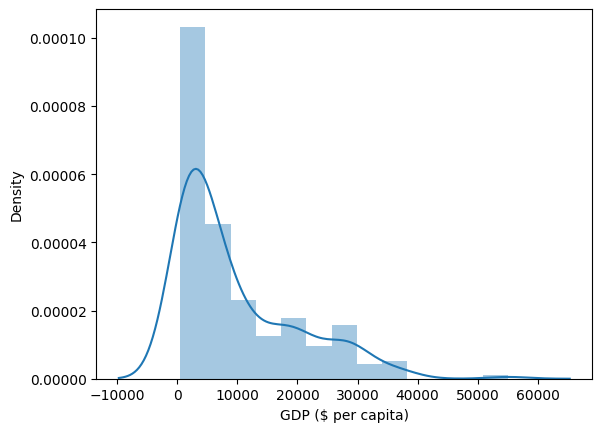

In [ ]:
sns.distplot(df['GDP ($ per capita)'])

<Axes: xlabel='Literacy (%)', ylabel='Count'>

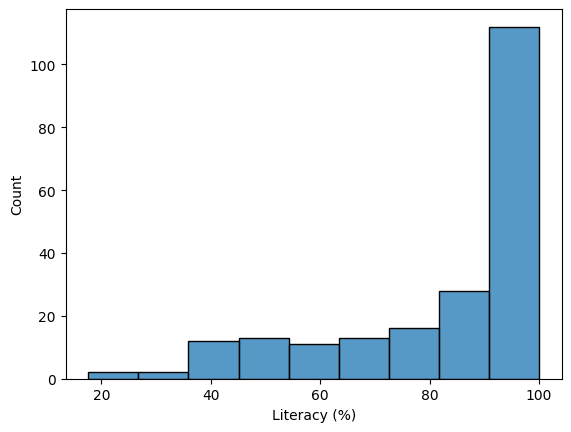

In [ ]:
sns.histplot(df['Literacy (%)'])

<Axes: xlabel='Industry', ylabel='Count'>

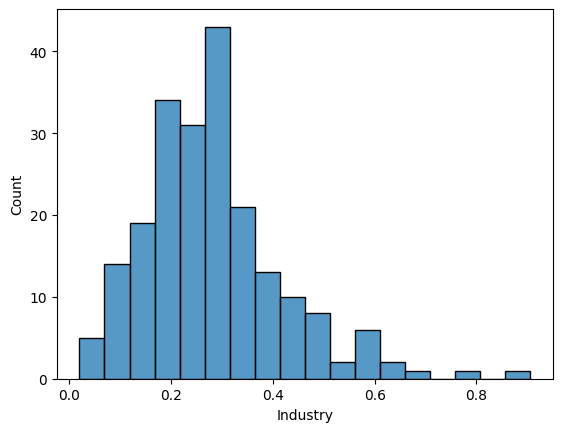

In [ ]:
sns.histplot(df['Industry'])




---


*Escriba* su respuesta en esta celda...


---



### Pregunta 1.8

El df contiene variables con missing values (`NaN`). Impute los `NaN` con el método que estime conveniente, justificando su decisión.

¿Es pertinente eliminar alguna de estas variables? Hágalo si es el caso.

In [ ]:
df.isna().sum()

,0
date,0
Country,0
Region,0
Population,0
Area (sq. mi.),0
Pop. Density (per sq. mi.),0
Coastline (coast/area ratio),0
Net migration,3
Infant mortality (per 1000 births),3
GDP ($ per capita),1


Podemos observar que el dataframe efectivamente tiene missing values. Al respecto, imputaremos las observaciones que tengan valores faltantes en Agriculture, Industry, y Service, pues no queremos que los datos faltantes ensucien las medidas estadísticas, y nos arriesguen a llegar a conclusiones incorrectas o sesgadas.
Respecto a los missing values en la variable "Climate", esta variable parece ser una variable categórica, por lo que el tratamiento que le daremos a dichos valores faltantes es reemplazarlos por la moda de la región; este tratamiento es

<Axes: >

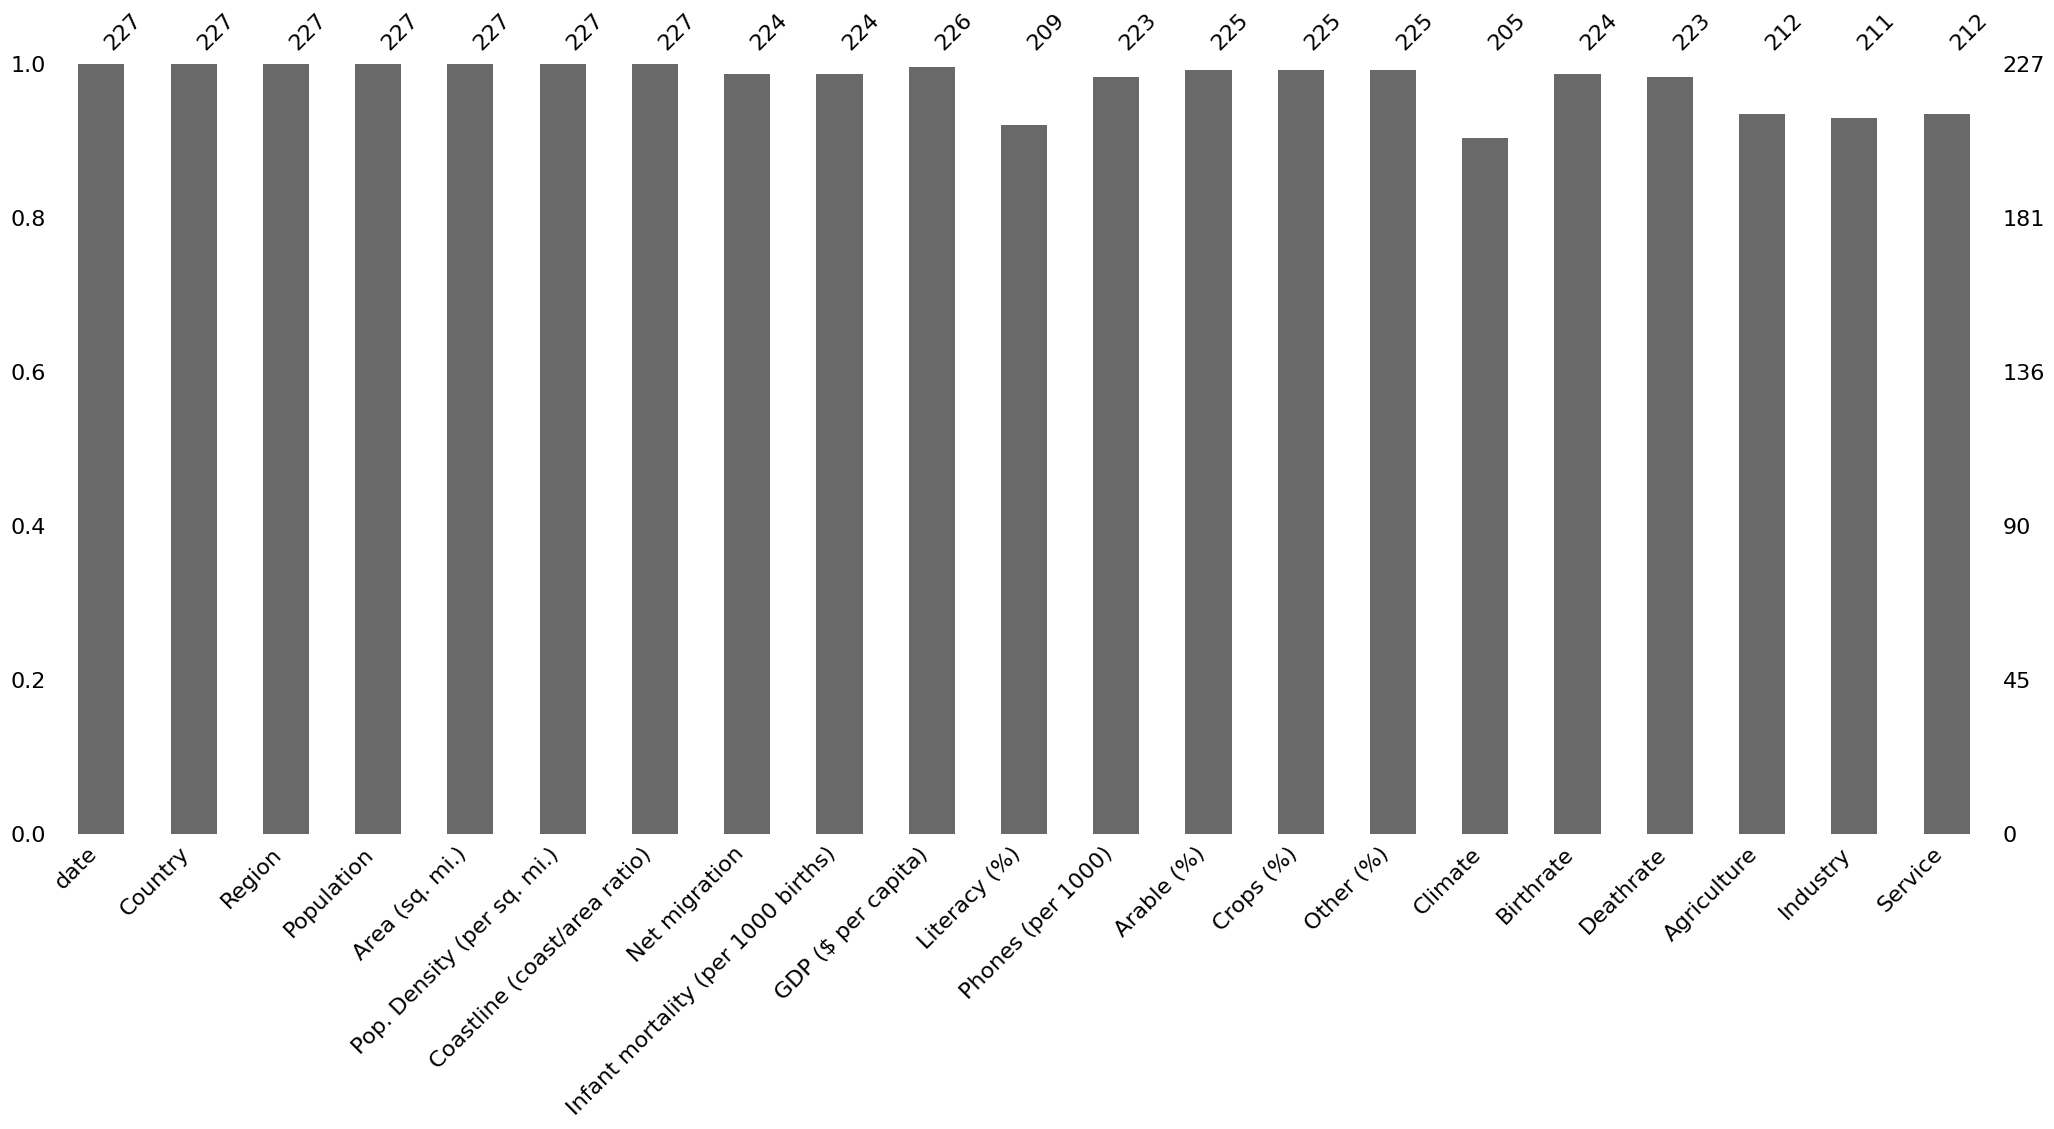

In [ ]:
msno.bar(df)

In [ ]:
df[df.isnull().any(axis=1)]

,date,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
3,2007-01-01,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,2007-01-01,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
5,2007-01-01,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,...,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
25,2007-01-01,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,...,215.4,13.60,2.96,83.44,4.0,8.77,8.27,0.142,0.308,0.550
36,2007-01-01,Canada,NORTHERN AMERICA,33098932,9984670,3.3,2.02,5.96,4.75,29800.0,...,552.2,4.96,0.02,95.02,NaN,10.78,7.80,0.022,0.294,0.684
47,2007-01-01,Cook Islands,OCEANIA,21388,240,89.1,50.00,NaN,NaN,5000.0,...,289.9,17.39,13.04,69.57,2.0,21.00,NaN,0.151,0.096,0.753
50,2007-01-01,Croatia,EASTERN EUROPE,4494749,56542,79.5,10.32,1.58,6.84,10600.0,...,420.4,26.09,2.27,71.65,NaN,9.61,11.48,0.070,0.308,0.622
52,2007-01-01,Cyprus,NEAR EAST,784301,9250,84.8,7.01,0.43,7.18,19200.0,...,NaN,7.79,4.44,87.77,3.0,12.56,7.68,0.037,0.198,0.765
58,2007-01-01,East Timor,ASIA (EX. NEAR EAST),1062777,15007,70.8,4.70,0.00,47.41,500.0,...,NaN,4.71,0.67,94.62,2.0,26.99,6.24,0.085,0.231,0.684
66,2007-01-01,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,...,503.8,2.14,0.00,97.86,NaN,14.05,8.70,0.270,0.110,0.620


In [ ]:
#El tratamiento que le daremos a las variables Agriculture, Industry, y Service es eliminar los missing values, para no caer en risgo de sesgar nuestro
df = df.dropna(subset=['Agriculture', 'Industry', 'Service'])
# El tratamiento que le daremos a la variable Climate es reemplazar cada valor missing por la moda de la región
moda_region = df.groupby('Country')['Region'].agg(lambda x: x.mode()[0])

df['Climate'] = df.apply(
    lambda row: moda_region[row['Country']] if pd.isna(row['Climate']) else row['Climate'], axis=1
)
# El tratamiento que le daremos a la variable Literacy es reemplazar los missing por la media de la Región
media_literacy_region = df.groupby('Region')['Literacy'].mean()

df['Literacy'] = df.apply(
    lambda row: media_literacy_region[row['Region']] if pd.isna(row['Literacy']) else row['Literacy'], axis=1
)
# El tratamiento que le daremos a la variable Phones es




---

Net migration:

Infant mortality:

GDP:

Literacy:

Phones:

Arable

Crops

Other

Climate: Quizás eliminar?

Birthrate

Deathrate

Agriculture, Industry, Service


---


### Pregunta 1.9

¿Cómo distribuye el `GDP ($ per capita)` en diferentes **regiones**? Defina una forma ilustrativa de gráficar el `GDP ($ per capita)` para todas las regiones en un mismo gráfico. Interprételo.

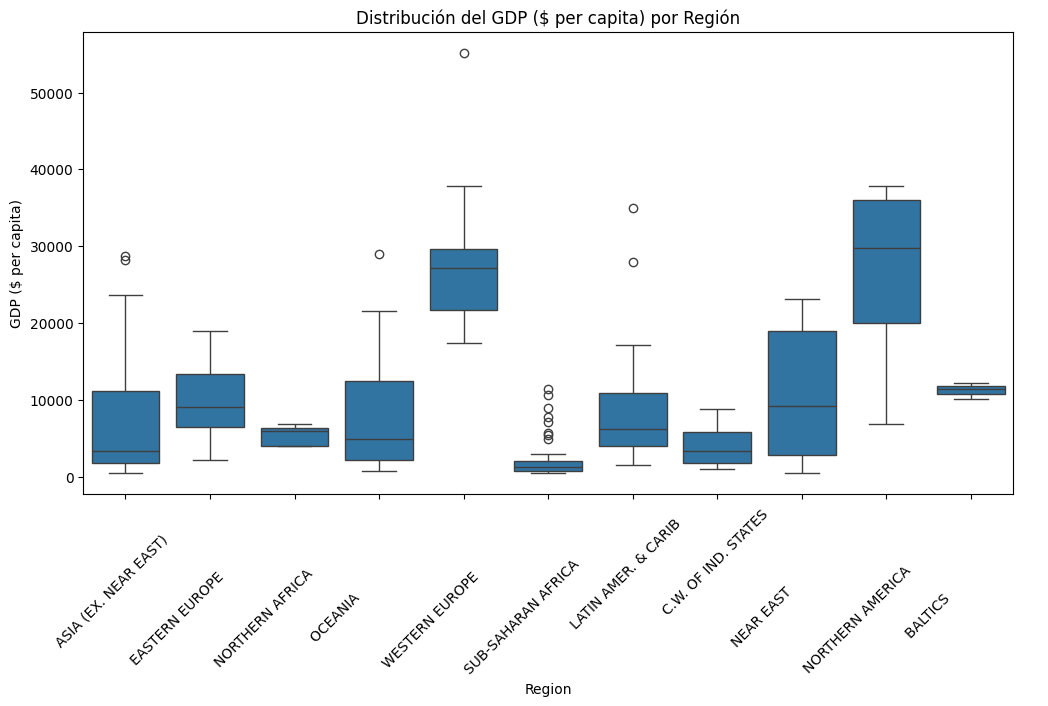

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='GDP ($ per capita)', data=df)
plt.xticks(rotation=45)
plt.title('Distribución del GDP ($ per capita) por Región')
plt.show()





---


*Escriba* su interpretación en esta celda...


---


### Pregunta 1.10

Supongamos que `GDP ($ per capita)` es su variable objetivo. Estudie la correlación de esta variable con el resto de las variables del `df`. ¿Por qué es importante analizar la correlación entre las variables?



In [ ]:
df[df.dtypes[df.dtypes != "object"].index].corr()["GDP ($ per capita)"]

,GDP ($ per capita)
date,NaN
Population,-0.039324
Area (sq. mi.),0.072185
Pop. Density (per sq. mi.),0.195773
Coastline (coast/area ratio),0.049118
Net migration,0.382461
Infant mortality (per 1000 births),-0.600774
GDP ($ per capita),1.000000
Literacy (%),0.513144
Phones (per 1000),0.834499



---


Es importante analizar la correlación entre la variable objetivo y las otras variables del dataframe, pues la correlación nos ayudaría para identificar patrones de comportamiento y tendencias entre las variables, lo cual podría sugerir una potencial relación entre las variables. Al analizar las relaciones entre las variables, podemos entenderlas a mayor cabalidad, y esto es muy valioso en un contexto en donde nos gustaría ser capaces de predecir valores y comportamientos de las variables, para tomar decisiones de políticas públicas.

Del análisis de correlaciones, obtenemos que las variables Phones, Birthrate, Infant mortality, Agriculture, Literacy y Service tienen una correlacion fuerte con GDP ($ per capita), mientras que las variable Net Migration y Climate muestran una correlación moderada, y las variables Pop. Density, Crops y Deathrate muestran un nivel de correlación debil con GDP ($), según el coeficiente de correlación de Pearson.


---


### Pregunta 1.11

Realice tres _scatterplots_ (uno por variable) de las tres variables con la mayor correlación con la variable objetivo.

Utilizando los parámetros de la función con la que hizo los _scatterplots_, coloque un título a cada gráfico y agregue colores a los _data points_ del _scatterplot_- Use colores diferentes por cada gráfico.

<Axes: xlabel='GDP ($ per capita)', ylabel='Phones (per 1000)'>

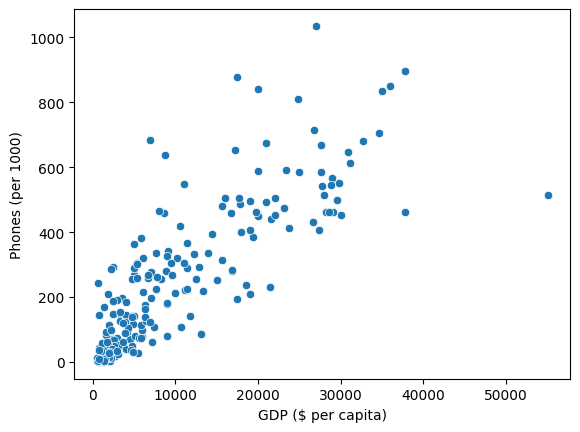

In [ ]:
sns.scatterplot(data=df, x='GDP ($ per capita)', y='Phones (per 1000)')

<Axes: xlabel='GDP ($ per capita)', ylabel='Birthrate'>

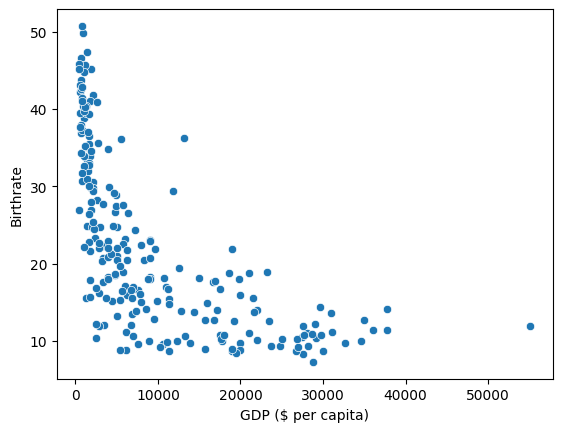

In [ ]:
sns.scatterplot(data=df, x='GDP ($ per capita)', y='Birthrate')

<Axes: xlabel='GDP ($ per capita)', ylabel='Infant mortality (per 1000 births)'>

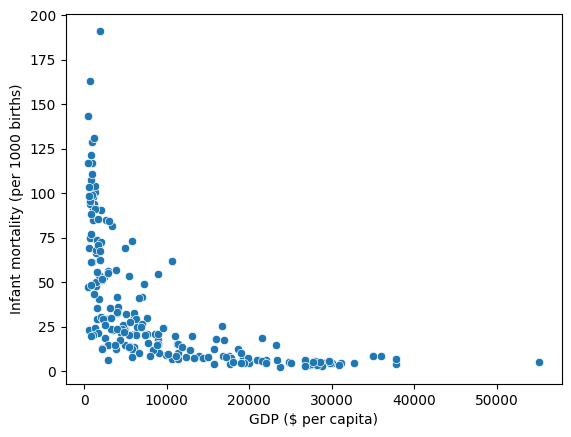

In [ ]:
sns.scatterplot(data=df, x='GDP ($ per capita)', y='Infant mortality (per 1000 births)')

### Pregunta 1.12

Cree una nueva columna `GDP (%)` que represente el GDP total de cada pais (no per capita) y agreguela al dataframe.

In [ ]:
df['GDP ($)']=df['GDP ($ per capita)']*df['Population']

In [ ]:
df.head()

,date,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service,GDP (%)
0,2007-01-01,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,...,3.2,12.13,0.22,87.65,46.60,20.34,0.380,0.240,0.380,2.173990e+10
1,2007-01-01,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,...,71.2,21.09,4.42,74.49,15.11,5.22,0.232,0.188,0.579,1.611745e+10
2,2007-01-01,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,...,78.1,3.22,0.25,96.53,17.14,4.61,0.101,0.600,0.298,1.975805e+11
5,2007-01-01,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,...,7.8,2.41,0.24,97.35,45.11,24.20,0.096,0.658,0.246,2.304143e+10
6,2007-01-01,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,...,460.0,0.00,0.00,100.00,14.17,5.34,0.040,0.180,0.780,1.159022e+08


### Pregunta 1.13

Repita el análisis de correlaciones para `GDP ($)` excluyendo `GDP ($ per capita)` del análisis. ¿Cambian las variables que más correlacionan? Justifique.

In [ ]:
df[df.dtypes[df.dtypes != "object"].index].corr()["GDP ($)"]

,GDP ($)
date,NaN
Population,0.639435
Area (sq. mi.),0.556312
Pop. Density (per sq. mi.),-0.028738
Coastline (coast/area ratio),-0.065539
Net migration,0.054543
Infant mortality (per 1000 births),-0.123894
GDP ($ per capita),0.247632
Literacy (%),0.110977
Phones (per 1000),0.232506





---
Las variables Población y área tienen una correlacion fuerte con GDP ($), mientras que la variable Phones, Infant mortality, GDP ($ per capita), Literacy, Arable, Birthrate y Agriculture muestran un nivel de correlación debil con GDP ($), según el coeficiente de correlación de Pearson.

---


### Pregunta 1.14

Detecte las observaciones outliers de las tres variables seleccionadas en la pregunta anterior. Además, impute estas observaciones si usted lo considera necesario. Justifique su decisión.

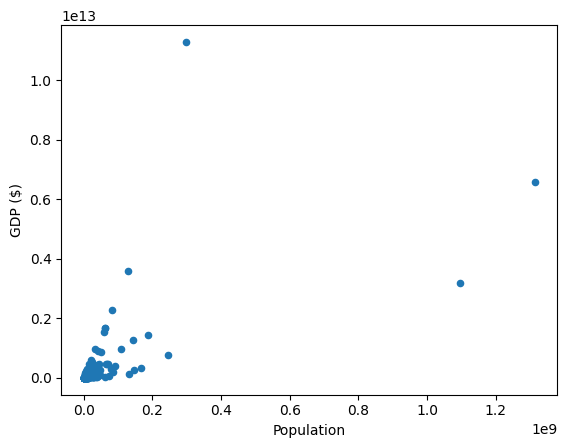

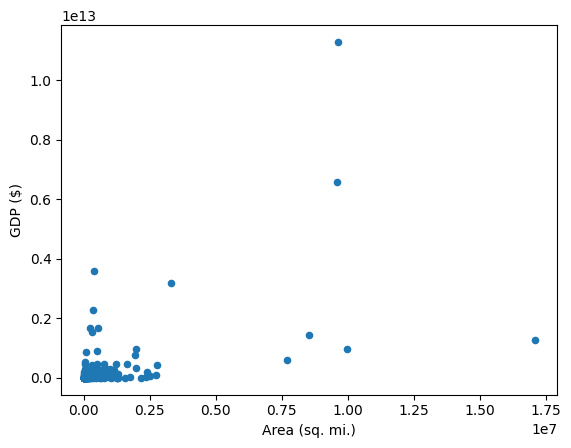

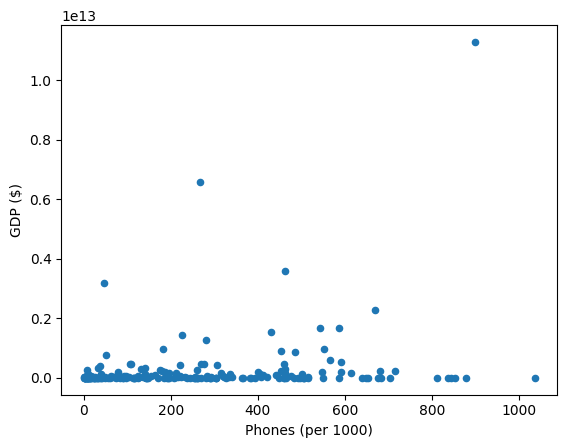

In [ ]:
lista = ['Population', 'Area (sq. mi.)', 'Phones (per 1000)']
for var in lista:
  df.plot.scatter(x=var, y="GDP ($)")
  plt.show()


In [ ]:
df2 = df[(df["Population"]<0.25) & (df["Area (sq. mi.)"]<0.3) & (df["Phones (per 1000)"]<800)]



```
# Tiene formato de código
```




---


Realizando Scatterplots de las variables, podemos observar que estas tres tienen observaciones que se separan mucho del patron general de las otras observaciones en la variable.
Debido a lo atípicos que son estas observaciones, las identificamos como Outlayers, y las imputamos del df de forma que en nuestros análisis, seamos capaces de estudiar relaciones y patrones, sin ensuciar nuestras conclusiones con estos valores atípicos.


---



### Pregunta 1.15

En los ejemplos anteriores calculamos correlaciones para `GDP ($ per capita)` y `GDP ($)`. Genere un nuevo dataframe que tenga le variación porcentual de la correlación absoluta para cada una de las columnas de características, e.g., si la correlación en valor absoluto de `GDP ($ per capita)` vs `Industry` es 0.1 y la correlación `GDP ($)` vs `Industry` es 0.5, la variación deberá ser +500%. Dicha variación porcentual puede ser positiva o negativa, pero ordene los el dataframe de tal manera que la variación de correlación absoluta sea desendiente.

In [ ]:
df_num = df.select_dtypes(include=['number'])

corr_pc = df_num.corr()['GDP ($ per capita)'].abs()
corr_gdp = df_num.corr()['GDP ($)'].abs()

variacion1 = ((corr_pc-corr_gdp)/corr_gdp)*100
variacion2 = ((corr_gdp-corr_pc)/corr_pc)*100
df_variacion = pd.DataFrame({
    'Corr GDP per capita': corr_pc,
    'Corr GDP': corr_gdp,
    'Variacion (%)': variacion1,
    'Variacion 2 (%)': variacion2
})

df_variacion = df_variacion.sort_values(by='Variacion (%)', ascending=False)

df_variacion

,Corr GDP per capita,Corr GDP,Variacion (%),Variacion 2 (%)
Net migration,0.382461,0.054543,601.208884,-85.738914
Pop. Density (per sq. mi.),0.195773,0.028738,581.226960,-85.320604
Service,0.550216,0.094829,480.220208,-82.765164
Deathrate,0.201661,0.038199,427.919890,-81.057732
Infant mortality (per 1000 births),0.600774,0.123894,384.909226,-79.377584
Literacy (%),0.513144,0.110977,362.389236,-78.373199
GDP ($ per capita),1.000000,0.247632,303.824343,-75.236758
Agriculture,0.586769,0.146380,300.852333,-75.053158
Birthrate,0.650137,0.168497,285.843738,-74.082772
Phones (per 1000),0.834499,0.232506,258.914800,-72.138234


### Pregunta 1.16

Del resultado anterior, ¿qué caracerística del país tuvo una mayor diferencia absoluta el medir su correlación versus `GDP ($)` en vez de `GDP ($ per capita)`'. Interprete.




---


*Escriba* su respuesta e interpretación en esta celda...

---





## EDA con diferentes fuentes de **información**


Una situación habitual en _Data Science: es el manejo de información de múltiples fuentes para un mismo propósito. En este sentido, de ahora en adelante agregaremos un dataframe adicional a nuestro set de información, disponible en [Github](https://raw.githubusercontent.com/datasets/gini-index/refs/heads/main/data/gini-index.csv). Lo llamaremos `df_gini`.

Este dataset contiene información histórica del Índice de Gini (economía), el cual captura la desigualdad económica entre los quintiles de cada país. A mayor índice Gini, más desigual es un país en términos de ingresos. Para mayor información sobre los datos, puede dirigirse al [Repositorio](https://github.com/datasets/gini-index) completo. Para conocer más sobre el índice, una navegación por [Wikipedia](https://en.wikipedia.org/wiki/Gini_coefficient) debería ser suficiente.

### Pregunta 2.0

Cargue la base datos, asegúrese de que la variable de año esté en un formato de "fecha", y usando el diccionario de mapeo por inconsistencias de nombres, `country_name_mapping`, encuentre la forma de realizar un INNER JOIN entre ambas tablas, usando el nombre del país y el año de la observación como variables por las cuales hacer el JOIN. En el diccionario `country_name_mapping`, _keys_ corresponden a los valores de la tabla `df_gini` y _values_ a los de `df`.

Llame al dataframe resultante `df_merged`.

Si usted no se ha percatado, los nombres en la columna `Country` de `df` poseen espacios al final de estos. Elimine los espacios antes de realizar el INNER JOIN de interés (Hint: existe una función propia de las variables tipo `string` que realiza la labor de eliminar espacios al final de la palabra).



In [ ]:
# NO MODIFICAR, pero sí ejecutar
country_name_mapping = {
    "Bahamas": "Bahamas, The",
    "Bosnia and Herzegovina": "Bosnia & Herzegovina",
    "Myanmar": "Burma",
    "Cape Verde": "Cabo Verde",
    "Central African Republic": "Central African Rep.",
    "Congo, Rep.": "Congo, Repub. of the",
    "Czechia": "Czech Republic",
    "Timor-Leste": "East Timor",
    "Egypt, Arab Rep.": "Egypt",
    "West Bank and Gaza": "Gaza Strip",
    "Iran, Islamic Rep.": "Iran",
    "Korea, Dem. People's Rep.": "Korea, North",
    "Korea, Rep.": "Korea, South",
    "Kyrgyz Republic": "Kyrgyzstan",
    "Lao PDR": "Laos",
    "North Macedonia": "Macedonia",
    "Micronesia, Fed. Sts.": "Micronesia, Fed. St.",
    "Russian Federation": "Russia",
    "St. Kitts and Nevis": "Saint Kitts & Nevis",
    "St. Lucia": "Saint Lucia",
    "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines",
    "Slovak Republic": "Slovakia",
    "Eswatini": "Swaziland",
    "Syrian Arab Republic": "Syria",
    "Trinidad and Tobago": "Trinidad & Tobago",
    "Turkiye": "Turkey",
    "Venezuela, RB": "Venezuela",
    "Viet Nam": "Vietnam",
    "Yemen, Rep.": "Yemen"
}



In [ ]:
url = 'https://raw.githubusercontent.com/datasets/gini-index/refs/heads/main/data/gini-index.csv'
df_gini = pd.read_csv(url)
df_gini

,Country Name,Country Code,Year,Value
0,Albania,ALB,1996,27.0
1,Albania,ALB,2002,31.7
2,Albania,ALB,2005,30.6
3,Albania,ALB,2008,30.0
4,Albania,ALB,2012,29.0
...,...,...,...,...
2106,Zambia,ZMB,2015,55.8
2107,Zambia,ZMB,2022,51.5
2108,Zimbabwe,ZWE,2011,43.2
2109,Zimbabwe,ZWE,2017,44.3


In [ ]:
df_gini["Year"] = pd.to_datetime(df_gini["Year"], format="%Y")
df['date']=pd.to_datetime(df['date'], format="%Y")

df["Country"] = df["Country"].str.strip()

df_gini["Country Name"] = df_gini["Country Name"].replace(country_name_mapping)

In [ ]:
df_merged = pd.merge(df, df_gini, left_on=["Country", "date"], right_on=["Country Name", "Year"], how="inner")

df_merged

,date,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Birthrate,Deathrate,Agriculture,Industry,Service,GDP ($),Country Name,Country Code,Year,Value
0,2007-01-01,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,...,16.73,7.55,0.095,0.358,0.547,4.471245e+11,Argentina,ARG,2007-01-01,46.3
1,2007-01-01,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,...,12.07,8.23,0.239,0.343,0.418,1.041730e+10,Armenia,ARM,2007-01-01,31.2
2,2007-01-01,Austria,WESTERN EUROPE,8192880,83870,97.7,0.00,2.00,4.66,30000.0,...,8.74,9.76,0.018,0.304,0.678,2.457864e+11,Austria,AUT,2007-01-01,30.6
3,2007-01-01,Belarus,C.W. OF IND. STATES,10293011,207600,49.6,0.00,2.54,13.37,6100.0,...,11.16,14.02,0.093,0.316,0.591,6.278737e+10,Belarus,BLR,2007-01-01,29.6
4,2007-01-01,Belgium,WESTERN EUROPE,10379067,30528,340.0,0.22,1.23,4.68,29100.0,...,10.38,10.27,0.010,0.240,0.749,3.020308e+11,Belgium,BEL,2007-01-01,29.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2007-01-01,Thailand,ASIA (EX. NEAR EAST),64631595,514000,125.7,0.63,0.00,20.48,7400.0,...,13.87,7.04,0.099,0.441,0.460,4.782738e+11,Thailand,THA,2007-01-01,39.8
63,2007-01-01,Ukraine,C.W. OF IND. STATES,46710816,603700,77.4,0.46,-0.39,20.34,5400.0,...,8.82,14.39,0.187,0.452,0.361,2.522384e+11,Ukraine,UKR,2007-01-01,27.0
64,2007-01-01,United Kingdom,WESTERN EUROPE,60609153,244820,247.6,5.08,2.19,5.16,27700.0,...,10.71,10.13,0.005,0.237,0.758,1.678874e+12,United Kingdom,GBR,2007-01-01,34.4
65,2007-01-01,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,...,14.14,8.26,0.010,0.204,0.787,1.128119e+13,United States,USA,2007-01-01,40.8


### Pregunta 2.1

Repita el ejercicio de la obtención de un ranking para las correlaciones absolutas, tal como lo hizo para el GDP per cápita. ¿Cuáles son las relaciones que más le sorprenden? ¿Cuáles son las que están en línea con lo que esperaba? Justifique para ambos casos.







---


*Escriba* su respuesta y justificación en esta celda...

---





Finalmente, agregaremos una tercera base de datos al análisis, también disponible en [Github](https://raw.githubusercontent.com/datasets/co2-fossil-by-nation/refs/heads/main/data/fossil-fuel-co2-emissions-by-nation.csv) con su repectivo
[Repositorio](https://github.com/datasets/co2-fossil-by-nation). Esta contiene emisiones de dióxido de carbono (CO2) total y por fuentes, desagregado por país. La base de datos contiene datos desde el siglo XVI y la frecuencia es anual.



### Pregunta 2.2

Cargue la base de datos llamándola `df_co2`. Asegúrese de que todas las variables estén en su correcto formato (años deben estar en un formato de fecha). ¿Qué cuidados identifica usted que debiésemos tener al momento de observar valores nulos en esta base de datos?

Adicionalmente, para cada palabra en la columna `Country`, asegúrese de que la primera letra siempre sea mayúscula y que el resto de letras sean minúsculas (Hint: revise `methods` propios de las variables tipo `string`).

Luego, reemplace valores en `df_co2["Country"]` según el mapping otorgado. En el diccionario `country_name_mapping_co2`, _keys_ corresponden a los valores de la tabla `df_co2` y _values_ a los de `df`.




In [ ]:
# NO MODIFICAR, pero sí ejecutar
country_name_mapping_co2 = {
    "United States Of America": "United States",
    "France (Including Monaco)": "France",
    "Italy (Including San Marino)": "Italy",
    "Plurinational State Of Bolivia": "Bolivia",
    "Federal Republic Of Germany": "Germany",
    "Former German Democratic Republic": "Germany",
    "Republic Of Moldova": "Moldova",
    "United Republic Of Tanzania": "Tanzania",
    "Japan (Excluding The Ruyuku Islands)": "Japan",
    "Hong Kong Special Adminstrative Region Of China": "Hong Kong",
    "Peninsular Malaysia": "Malaysia",
    "Democratic Republic Of The Congo (Formerly Zaire)": "Congo, Dem. Rep.",
    "Brunei (Darussalam)": "Brunei",
    "Myanmar (Formerly Burma)": "Burma",
    "Syrian Arab Republic": "Syria",
    "Islamic Republic Of Iran": "Iran",
    "Republic Of Korea": "Korea, South",
    "Democratic People S Republic Of Korea": "Korea, North",
    "Russian Federation": "Russia",
    "Viet Nam": "Vietnam",
    "Yemen": "Yemen, Rep.",
    "Trinidad And Tobago": "Trinidad & Tobago",
    "Bahamas": "Bahamas, The",
    "Micronesia": "Micronesia, Fed. St.",
    "Slovakia": "Slovakia",
    "St. Vincent & The Grenadines": "Saint Vincent and the Grenadines",
    "Saint Lucia": "Saint Lucia",
    "Antigua & Barbuda": "Antigua & Barbuda",
    "Saint Kitts-Nevis-Anguilla": "Saint Kitts & Nevis",
    "Netherland Antilles And Aruba": "Netherlands Antilles",
    "Timor-Leste (Formerly East Timor)": "East Timor",
    "Macau Special Adminstrative Region Of China": "Macau",
    "Republic Of Cameroon": "Cameroon",
    "Republic Of Sudan": "Sudan",
    "Lao People S Democratic Republic": "Laos",
    "Libyan Arab Jamahiriyah": "Libya",
    "Cote D Ivoire": "Cote d'Ivoire",
    "British Virgin Islands": "British Virgin Is.",
    "Faeroe Islands": "Faroe Islands",
    "China (Mainland)": "China",
}




---


*Escriba* su respuesta y justificación en esta celda...

---



### Pregunta 2.3

En un mismo gráfico, grafique las series de emisiones totales de CO2 para los siguientes países:

- Reino Unido
- Canadá
- Alemania
- Francia
- Estados Unidos
- Brasil
- China
- Japón
- India


Para cada serie, añada una leyenda con el nombre del país.


### Pregunta 2.4

Para el año 2007, por cada país realice un ranking de las fuentes con más emisiones de CO2 excluyendo las variables `Per Capita` y `Bunker fuels (Not in Total)`. Es decir, asigne un número de 1 a 5 a $\{$ `Solid Fuel`, `Liquid Fuel`, `Gas Fuel`, `Cement`, `Gas Flaring` $\}$, donde 1 es la mayor fuente de emisión de ese país en aquel año, y 5 indica que fue la menor; así para todos los países.

Si en 2007 no se reporta una fuente de emisión para un país, por ejemplo, si emisiones de `Gas Flaring` no se reportara, entonces asigne números de 1 a 4 a las fuentes restantes. Análogo para un menor número de datos.

Luego, por cada variable grafique un histograma de frecuencias del ranking que obtuvo la fuente emisión a lo largo de todos los países.

¿Cuál fue la fuente más contaminante en la mayoría de países en 2007?




---


*Escriba* su respuesta y justificación en esta celda...

---





### Pregunta 2.5

Para cada serie de total de emisiones por país, calcule el cambio porcentual a través del tiempo. Realice imputación de missings si considera necesario, justificando su imputación. Si no lo considera necesario, también justifique (se evaluará un buen criterio fundamentado).

Repita el ejercicio del gráfico de series de tiempo anterior, pero graficando los **cambios porcentuales** para años mayores o iguales a 1995. ¿Cómo interpretaría económicamente el shock sobre las emisiones de CO2 tanto en la crisis subprime como en la crisis del Covid-19?



---


*Escriba* su justificación e interpretación en esta celda...



---





### Pregunta 2.6

Calcule el promedio a lo largo de toda la muestra ($\mathbb{E}[\cdot]$) para el cambio porcentual de cada país y genere una nueva serie con la resta entre el cambio porcentual del país $i$ en el año $t$, y el promedio del cambio porcentual del país $i$. En otras palabras, genere una serie con _**desvíos del cambio porcentual promedio**_ $\forall i,t$:

$$Nueva Serie_i = \Delta \% TotalCO2_{i,t} - \mathbb{E}[{\Delta \% TotalCO2_{i,t}}]$$

Luego, para los siguientes países:

- Reino Unido
- Canadá
- Alemania
- Francia
- Estados Unidos
- Japón
- Italia
- España


grafique en un panel _1x2_ la desviación del cambio porcentual respecto al promedio entre 2007 y 2010 en lado izquierdo, y entre 2017 y 2020 en el lado derecho (Hint: Hay comandos que facilitan esta labor. Puede intentar con `fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)`, por ejemplo).

¿Existe algún país en particular que mostró mayores desviaciones atípicas de emisión de CO2 durante el periodo de la crisis sub-prime? ¿Cómo es el comportamiento de las desviaciones atípicas de CO2 de este país durante la crisis del Covid-19?


---


*Escriba* su respuesta en esta celda...



---





### Pregunta 2.7

Genere un nuevo dataframe llamado `df_final`. Para esto, realice un INNER JOIN entre el dataframe `df_co2` y `df_merged` por "año y país" (debería terminar sólo con valores de 2007 si usted realiza un INNER JOIN).

Finalmente, grafique un mapa de calor de correlaciones (_heatmapt_) entre las variables numéricas ,excluyendo fechas.

¿Qué variables económicas, demográficas y de desarrollo humano muestran relación más importante con las emisiones de CO2? Interprete estas relaciones.


---


*Escriba* su respuesta e interpretación en esta celda...



---
